In [20]:
#Vi importerer nødveninge moduler
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(color_codes=True)
#referanser https://www.kaggle.com/saswataroy09/new-york-house-price-prediction

In [21]:
#Vi importerer csv fil av datasettet
df1 = pd.read_csv('/Users/eliasnilsen/Desktop/Studie/VÅR2021/INFO284/Exam/nyc-rolling-sales.csv')

In [39]:
#Vi ser over litt av datasettet for å få en ide av hvordan det ser ut og hva det inneholder
df1.head(10)

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00
5,9,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,405,16,,C4,516 EAST 12TH STREET,...,20,0,20,2581,9730,1900,2,C4,-,2017-07-20 00:00:00
6,10,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,406,32,,C4,210 AVENUE B,...,8,0,8,1750,4226,1920,2,C4,3192840,2016-09-23 00:00:00
7,11,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,407,18,,C7,520 EAST 14TH STREET,...,44,2,46,5163,21007,1900,2,C7,-,2017-07-20 00:00:00
8,12,1,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,2,379,34,,D5,141 AVENUE D,...,15,0,15,1534,9198,1920,2,D5,-,2017-06-20 00:00:00
9,13,1,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,2,387,153,,D9,629 EAST 5TH STREET,...,24,0,24,4489,18523,1920,2,D9,16232000,2016-11-07 00:00:00


In [23]:
#For denne modellen skal vi kun bruke data fra YEAR BUILT, GROSS SQUARE FEET og SALE PRICE 
#Vi sletter derfor all annen data fra dataframen, ettersom de ikke skal brukes og ikke er nødvendige å ha med videre
#Vi lager en kopi av det originale dataframen og dropper dataen fra den nye kopien
df2 = df1.copy()
df2.drop(['Unnamed: 0', 'BOROUGH', 'EASE-MENT','NEIGHBORHOOD', 'BUILDING CLASS CATEGORY', 'TAX CLASS AT PRESENT', 
         'BLOCK', 'LOT', 'BUILDING CLASS AT PRESENT', 'ADDRESS', 'APARTMENT NUMBER', 'ZIP CODE', 'RESIDENTIAL UNITS',
         'COMMERCIAL UNITS', 'TOTAL UNITS', 'LAND SQUARE FEET', 'TAX CLASS AT TIME OF SALE', 'BUILDING CLASS AT TIME OF SALE', 'SALE DATE'], axis=1, inplace=True)

In [24]:
#Vi sjekker at den nye dataframen ble riktig
#Når vi sjekker over dataframen ser vi at SALE PRICE inneholder '-' i noen av sine rows, noe som indikerer at
#disse ikke inneholder data. Vi fjerner disse senere
df2.head()

,GROSS SQUARE FEET,YEAR BUILT,SALE PRICE
0,6440,1900,6625000
1,18690,1900,-
2,7803,1900,-
3,6794,1913,3936272
4,4615,1900,8000000


In [25]:
#Vi sjekker for duplicates i dataframen og ser at det er 21312 duplicates i datasettet, disse må fjernes
sum(df2.duplicated())

21312

In [26]:
#Vi sletter duplicates og sjekker om det fungerte
#Nå er det null duplicates i datasettet og vi kan fortsette
df2 = df2.drop_duplicates(df2.columns, keep='last')
sum(df2.duplicated())

0

In [27]:
#Vi sjekker over unike årstall i YEAR BUILT
#Her ser vi at noen at årene er f.eks 0 og 1111,
#disse årene kan antas som feil/urealistiske og vil derfor fjerne disse
df2['YEAR BUILT'].unique()

array([1900, 1913, 1920, 1910, 2009, 1925, 1902, 1928, 1930, 1935, 1937,
       1915, 1950, 1929, 1901, 1940, 2005,    0, 2014, 1965, 2013, 2003,
       2006, 2007, 1899, 1989, 1850, 1905, 1864, 1917, 1911, 1983, 1926,
       1963, 1960, 1889, 1898, 1939, 1938, 1927, 1909, 1958, 1904, 1907,
       2008, 1987, 1931, 1984, 1948, 2004, 1918, 1875, 2012, 1973, 2011,
       1922, 2001, 1932, 1980, 1908, 1953, 1906, 2015, 1946, 1921, 2010,
       1954, 1111, 1924, 1990, 1890, 1991, 1895, 2016, 1957, 1986, 1988,
       1966, 1998, 1923, 1969, 2017, 1934, 1956, 1982, 1914, 1903, 1967,
       1840, 1912, 1964, 1955, 1961, 1851, 2000, 1959, 1962, 1945, 1972,
       1976, 1916, 1880, 1870, 1970, 1846, 1941, 1952, 1896, 1985, 1981,
       1888, 1947, 1975, 1974, 1968, 2002, 1994, 1892, 1894, 1891, 1996,
       1997, 1951, 1949, 1999, 1800, 1977, 1942, 1979, 1978, 1826, 1881,
       1971, 1919, 1883, 1936, 1993, 1995, 1933, 1992, 1943, 1944, 1847,
       1829, 1844, 1835, 1852, 1856, 1854, 1832, 18

In [28]:
#Vi antar at realistisk byggeår er år fra 1600-tallet og oppover, og sletter alt som ligger under
df2=df2[df2['YEAR BUILT']>1600]

In [29]:
#Sjekker om det fungerte
df2['YEAR BUILT'].unique()

array([1900, 1913, 1920, 1910, 2009, 1925, 1902, 1928, 1930, 1935, 1937,
       1915, 1950, 1929, 1901, 1940, 2005, 2014, 1965, 2013, 2003, 2006,
       2007, 1899, 1989, 1850, 1905, 1864, 1917, 1911, 1983, 1926, 1963,
       1960, 1889, 1898, 1939, 1938, 1927, 1909, 1958, 1904, 1907, 2008,
       1987, 1931, 1984, 1948, 2004, 1918, 1875, 2012, 1973, 2011, 1922,
       2001, 1932, 1980, 1908, 1953, 1906, 2015, 1946, 1921, 2010, 1954,
       1924, 1990, 1890, 1991, 1895, 2016, 1957, 1986, 1988, 1966, 1998,
       1923, 1969, 2017, 1934, 1956, 1982, 1914, 1903, 1967, 1840, 1912,
       1964, 1955, 1961, 1851, 2000, 1959, 1962, 1945, 1972, 1976, 1916,
       1880, 1870, 1970, 1846, 1941, 1952, 1896, 1985, 1981, 1888, 1947,
       1975, 1974, 1968, 2002, 1994, 1892, 1894, 1891, 1996, 1997, 1951,
       1949, 1999, 1800, 1977, 1942, 1979, 1978, 1826, 1881, 1971, 1919,
       1883, 1936, 1993, 1995, 1933, 1992, 1943, 1944, 1847, 1829, 1844,
       1835, 1852, 1856, 1854, 1832, 1845, 1849, 18

In [30]:
#Lager ny dataframe og gjør om - tegnet til 0
df3 = df2.copy()
df3.replace({"-":0},inplace=True)
df3.replace({' -  ':0}, inplace=True)
df3[['GROSS SQUARE FEET', 'SALE PRICE', 'YEAR BUILT']] = df3[['GROSS SQUARE FEET', 'SALE PRICE', 'YEAR BUILT']].astype(float)

In [31]:
#her fjerner vi rows som inneholder 0
#vi kunne også, som et alternativ, erstattet dataen med en mean value summert fra den andre dataen i kollonen,
#men vi velger og droppe dem for å gjøre det enkelt
df3=df3[df3['SALE PRICE']!=0]
df3=df3[df3['GROSS SQUARE FEET']!=0]
df3=df3[df3['YEAR BUILT']!=0]

<AxesSubplot:xlabel='GROSS SQUARE FEET', ylabel='SALE PRICE'>

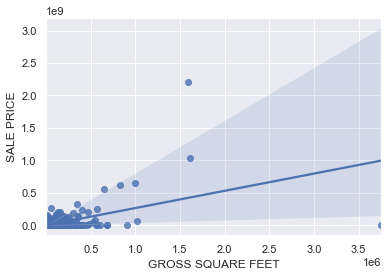

In [32]:
#vi setter SALE PRICE opp mot GROSS SQUARE FEET og sjekker for outliers
#for å visualisere og få et bedre uttrykk av eventuelle outliers setter vi opp dataen i et graf
#grafen viser veldig tydelig at det er enkelte data som er veldig urealistisk og denne må vi fjerne
sns.regplot(x="GROSS SQUARE FEET", y="SALE PRICE", data=df3,ci=100,robust=False)

<AxesSubplot:xlabel='GROSS SQUARE FEET', ylabel='SALE PRICE'>

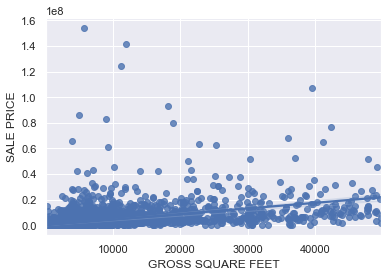

In [33]:
#Vi fjerner outliers i SALE PRICES som er over 20 000 000 og GROSS SQUARE FEET som er over 50 000
#Vi fjerner også eventuell data som er under 50 000 i SALE PRICE og under 20 i GROSS SQUARE FEET
#og lager en ny visualasjon av dataframen som gir et bedre og mer troverdig resultat
df3=df3[df3['SALE PRICE']<200000000]
df3=df3[df3['SALE PRICE']>1000]
df3=df3[df3['GROSS SQUARE FEET']<50000]
df3=df3[df3['GROSS SQUARE FEET']>20]
sns.regplot(x="GROSS SQUARE FEET", y="SALE PRICE", data=df3,ci=100,robust=False)

In [34]:
#sjekker over dataframen
df3.head(10)

,GROSS SQUARE FEET,YEAR BUILT,SALE PRICE
0,6440.0,1900.0,6625000.0
3,6794.0,1913.0,3936272.0
4,4615.0,1900.0,8000000.0
6,4226.0,1920.0,3192840.0
9,18523.0,1920.0,16232000.0
11,12350.0,2009.0,10350000.0
22,16776.0,1928.0,11900000.0
73,36472.0,2005.0,28000000.0
172,3360.0,1910.0,3300000.0
173,5608.0,1900.0,7215000.0


In [35]:
#Vi importer nødvendige moduler for å gjennomføre linear regression
#Vi scaler dataen ved å bruke StandardScaler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
df3['SALE PRICE'] = StandardScaler().fit_transform(np.log(df3['SALE PRICE']).values.reshape(-1,1))
df3['GROSS SQUARE FEET'] = StandardScaler().fit_transform(np.log(df3['GROSS SQUARE FEET']).values.reshape(-1,1))
df3['YEAR BUILT'] = StandardScaler().fit_transform(np.log(df3['YEAR BUILT']).values.reshape(-1,1))

In [36]:
#Vi splitter i train og test sett
y=df3['SALE PRICE']
X=df3.drop('SALE PRICE', axis=1)
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=0)

In [37]:
#Vi importer LinearRegression modulen og bruker treningssettet til å trene dataen
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [38]:
#Vi trener modellen og kalkulerer
reg_train_pred = reg.predict(X_train)
r2 = r2_score(y_train, reg_train_pred)
rmse = np.sqrt(mean_squared_error(y_train, reg_train_pred))
print('R2 for training: %.2f'%r2,'\nRMSE for training: %.2f'%rmse, '\n')

reg_test_pred = reg.predict(X_test)
r2 = r2_score(y_test, reg_test_pred)
rmse = np.sqrt(mean_squared_error(y_test, reg_test_pred))
print('R2 for training: %.2f'%r2,'\nRMSE for training: %.2f'%rmse, '\n')

print('Mean squared error: %.2f' % mean_squared_error(y_test, reg_test_pred))

R2 for training: 0.35 
RMSE for training: 0.81 

R2 for training: 0.34 
RMSE for training: 0.82 

Mean squared error: 0.67
